### Regression on high performance concrete compression tests

This project will try to regress over a very non linear problem. The compression resistance of high performance concrete.

[Data Source](https://www.kaggle.com/maajdl/yeh-concret-data)

[Post with more detailed information on the projdect](https://juliocent.github.io/portfolio/concrete)

### Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading files

In [2]:
filepath = '../dataset/Concrete_Data_csv.csv'
df = pd.read_csv(filepath)
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


Creating more readable column names

In [3]:
df.columns = ['cement','bfs','fly_ash','water','superplasticizer','coarse_a','fine_a','age','ccs']
df.head(1)

,cement,bfs,fly_ash,water,superplasticizer,coarse_a,fine_a,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


### Data Dictionary

- cement :  kg of cement in m3 of mixture.
- bfs : kg of Blast Furnace Slag in m3 of mixture - more information [here](https://en.wikipedia.org/wiki/Ground_granulated_blast-furnace_slag).
- fly_ash : kg of Fly Ash in m3 of mixture - more information [here](https://en.wikipedia.org/wiki/Fly_ash) and [here](http://www.flyashaustralia.com.au/WhatIsFlyash.aspx#:~:text=Fly%20ash%20is%20a%20fine,as%20a%20supplementary%20cementitious%20material.).
- Water : kg  in m3 of mixture
- Superplasticizer : kg in m3 of mixture - Used to reduce the amount of water used in concrete mixtures.
- Course aggregate : kg in m3 of mixture.
- Fine aggregate : kg in m3 of mixture.
- Age : in days (from 1 to 365).
- Concrete compressive strenght : in megapascals (MPa).


Looking at the DF

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
bfs,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_a,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_a,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
ccs,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   bfs               1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_a          1030 non-null   float64
 6   fine_a            1030 non-null   float64
 7   age               1030 non-null   int64  
 8   ccs               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### EDA and Data Munging

#### Cement

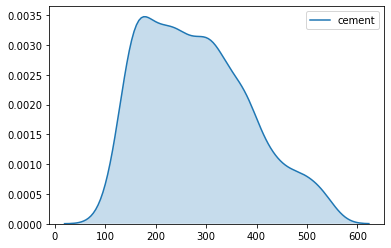

In [25]:
sns.kdeplot(df.cement, shade=1)

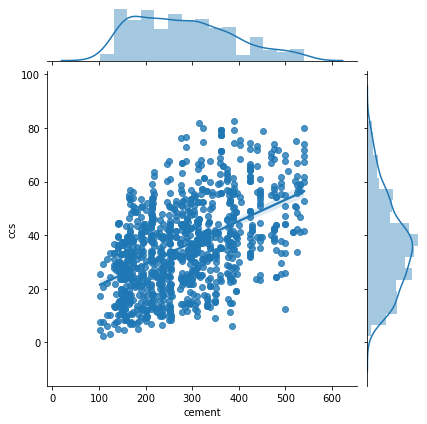

In [26]:
sns.jointplot(x="cement", y="ccs", data=df, kind="reg")

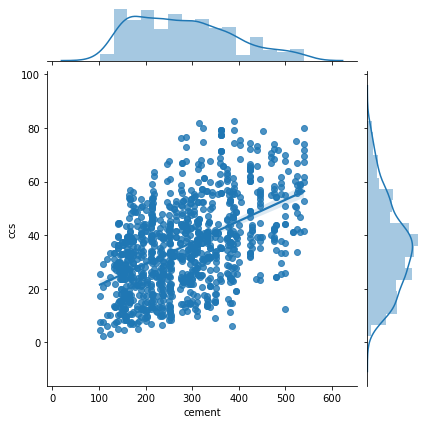

In [27]:
sns.jointplot(x="cement", y="ccs", data=df, kind="reg")

#### Water

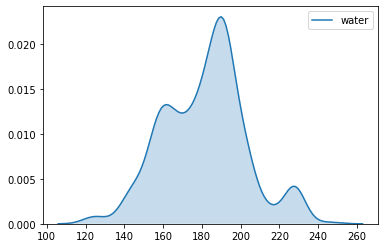

In [28]:
sns.kdeplot(df.water, shade=1)

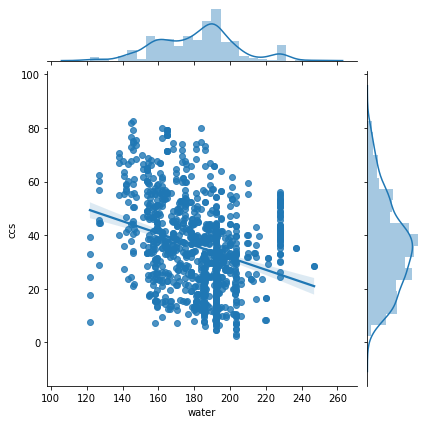

In [29]:
sns.jointplot(x="water", y="ccs", data=df, kind="reg")

Relationship between water, cement, age and ccs

In [4]:
def age_binning(age):
    if age <= 7:
        return 1
    elif age > 7 and age <= 14:
        return 2
    elif age > 14 and age <= 28:
        return 3
    elif age > 28 and age <= 56:
        return 4
    elif age > 56 and age <= 100:
        return 5
    elif age > 100 and age <= 270:
        return 6
    else:
        return 7

In [5]:
# Binning age with custom function
df['binned_age'] = df.age.apply(lambda x: age_binning(x) )

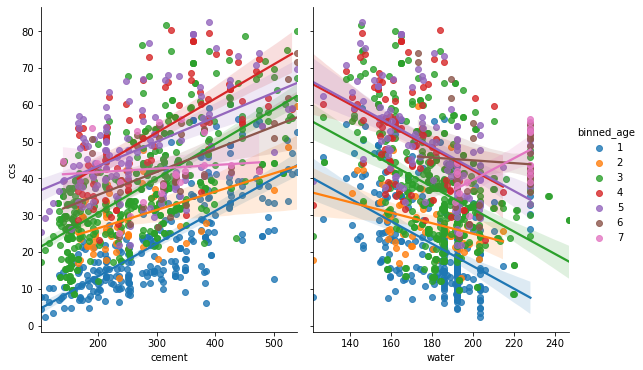

In [32]:
sns.pairplot(df, x_vars=["cement", "water"], y_vars=["ccs"],
             hue="binned_age", height=5, aspect=.8, kind="reg")

#### Age

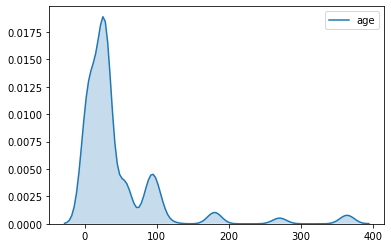

In [33]:
sns.kdeplot(df.age, shade=1)

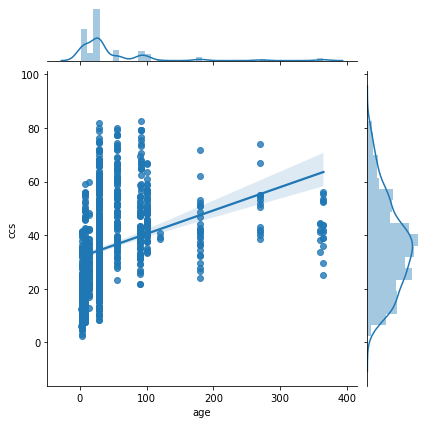

In [34]:
sns.jointplot(x="age", y="ccs", data=df, kind="reg")

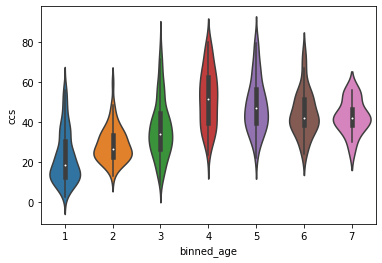

In [15]:
sns.violinplot(x="binned_age", y='ccs', data=df )
plt.savefig('age_violin.png')

#### Superplasticizer

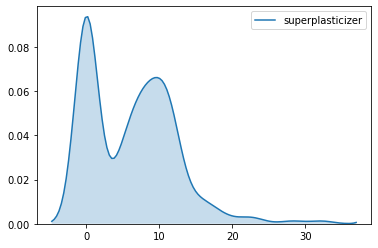

In [36]:
sns.kdeplot(df.superplasticizer, shade=1)

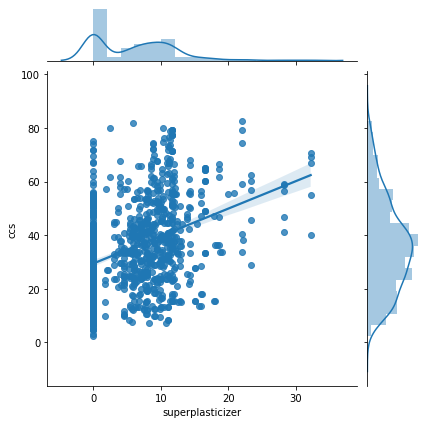

In [37]:
sns.jointplot(x="superplasticizer", y="ccs", data=df, kind="reg")

#### Coarse Aggregate

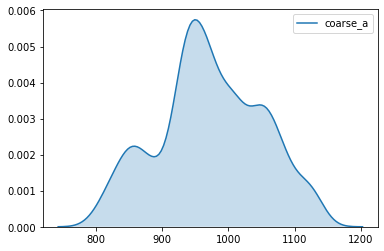

In [38]:
sns.kdeplot(df.coarse_a, shade=1)

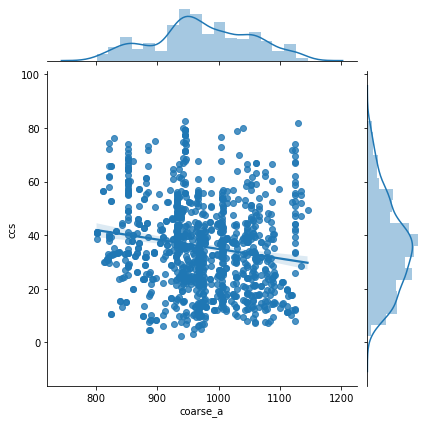

In [39]:
sns.jointplot(x="coarse_a", y="ccs", data=df, kind="reg")

#### Fine Aggregate

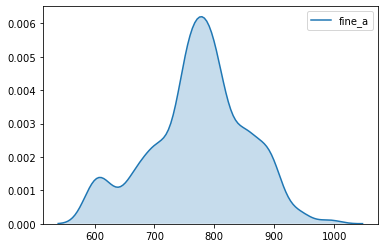

In [40]:
sns.kdeplot(df.fine_a, shade=1)

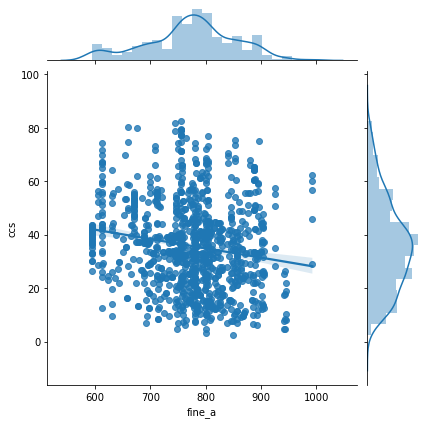

In [41]:
sns.jointplot(x="fine_a", y="ccs", data=df, kind="reg")

Looking at the relationship between coarse aggregate and fine aggregate

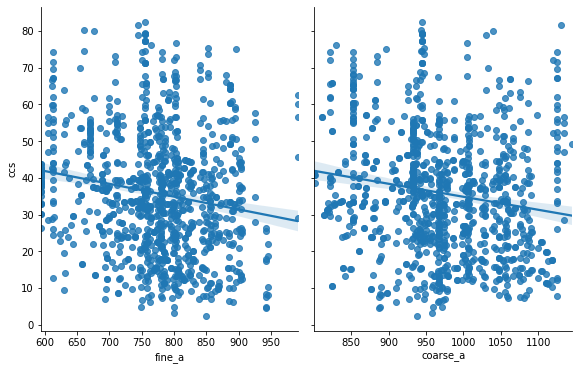

In [42]:
sns.pairplot(df, x_vars=["fine_a", "coarse_a"], y_vars=["ccs"],
              height=5, aspect=.8, kind="reg")

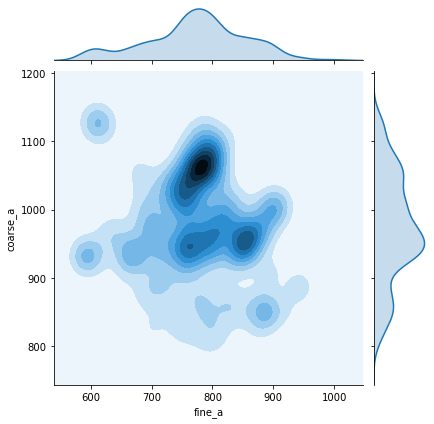

In [43]:
sns.jointplot(x="fine_a", y="coarse_a", data=df, kind="kde")

#### Blast Furnace Slag

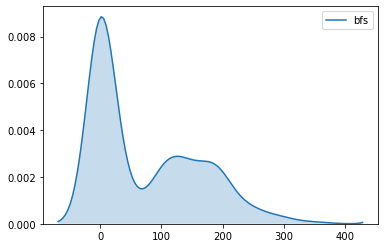

In [44]:
sns.kdeplot(df.bfs, shade=1)

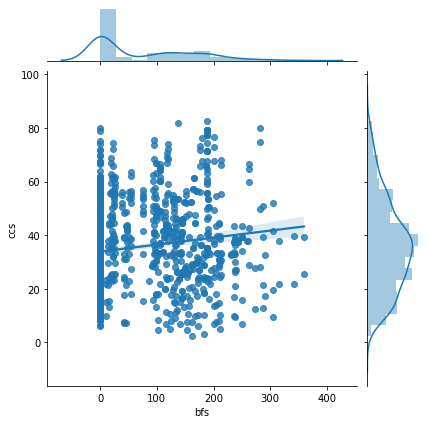

In [45]:
sns.jointplot(x="bfs", y="ccs", data=df, kind="reg")

#### Fly Ash

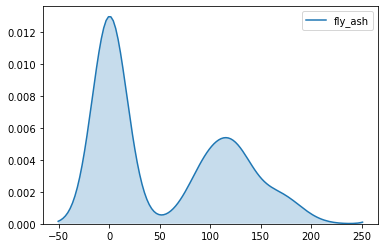

In [46]:
sns.kdeplot(df.fly_ash, shade=1)

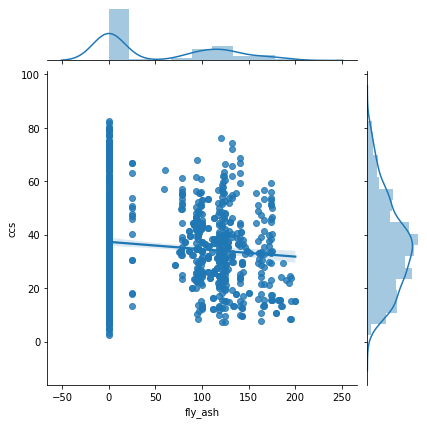

In [47]:
sns.jointplot(x="fly_ash", y="ccs", data=df, kind="reg")

### Pairplot and heatmap

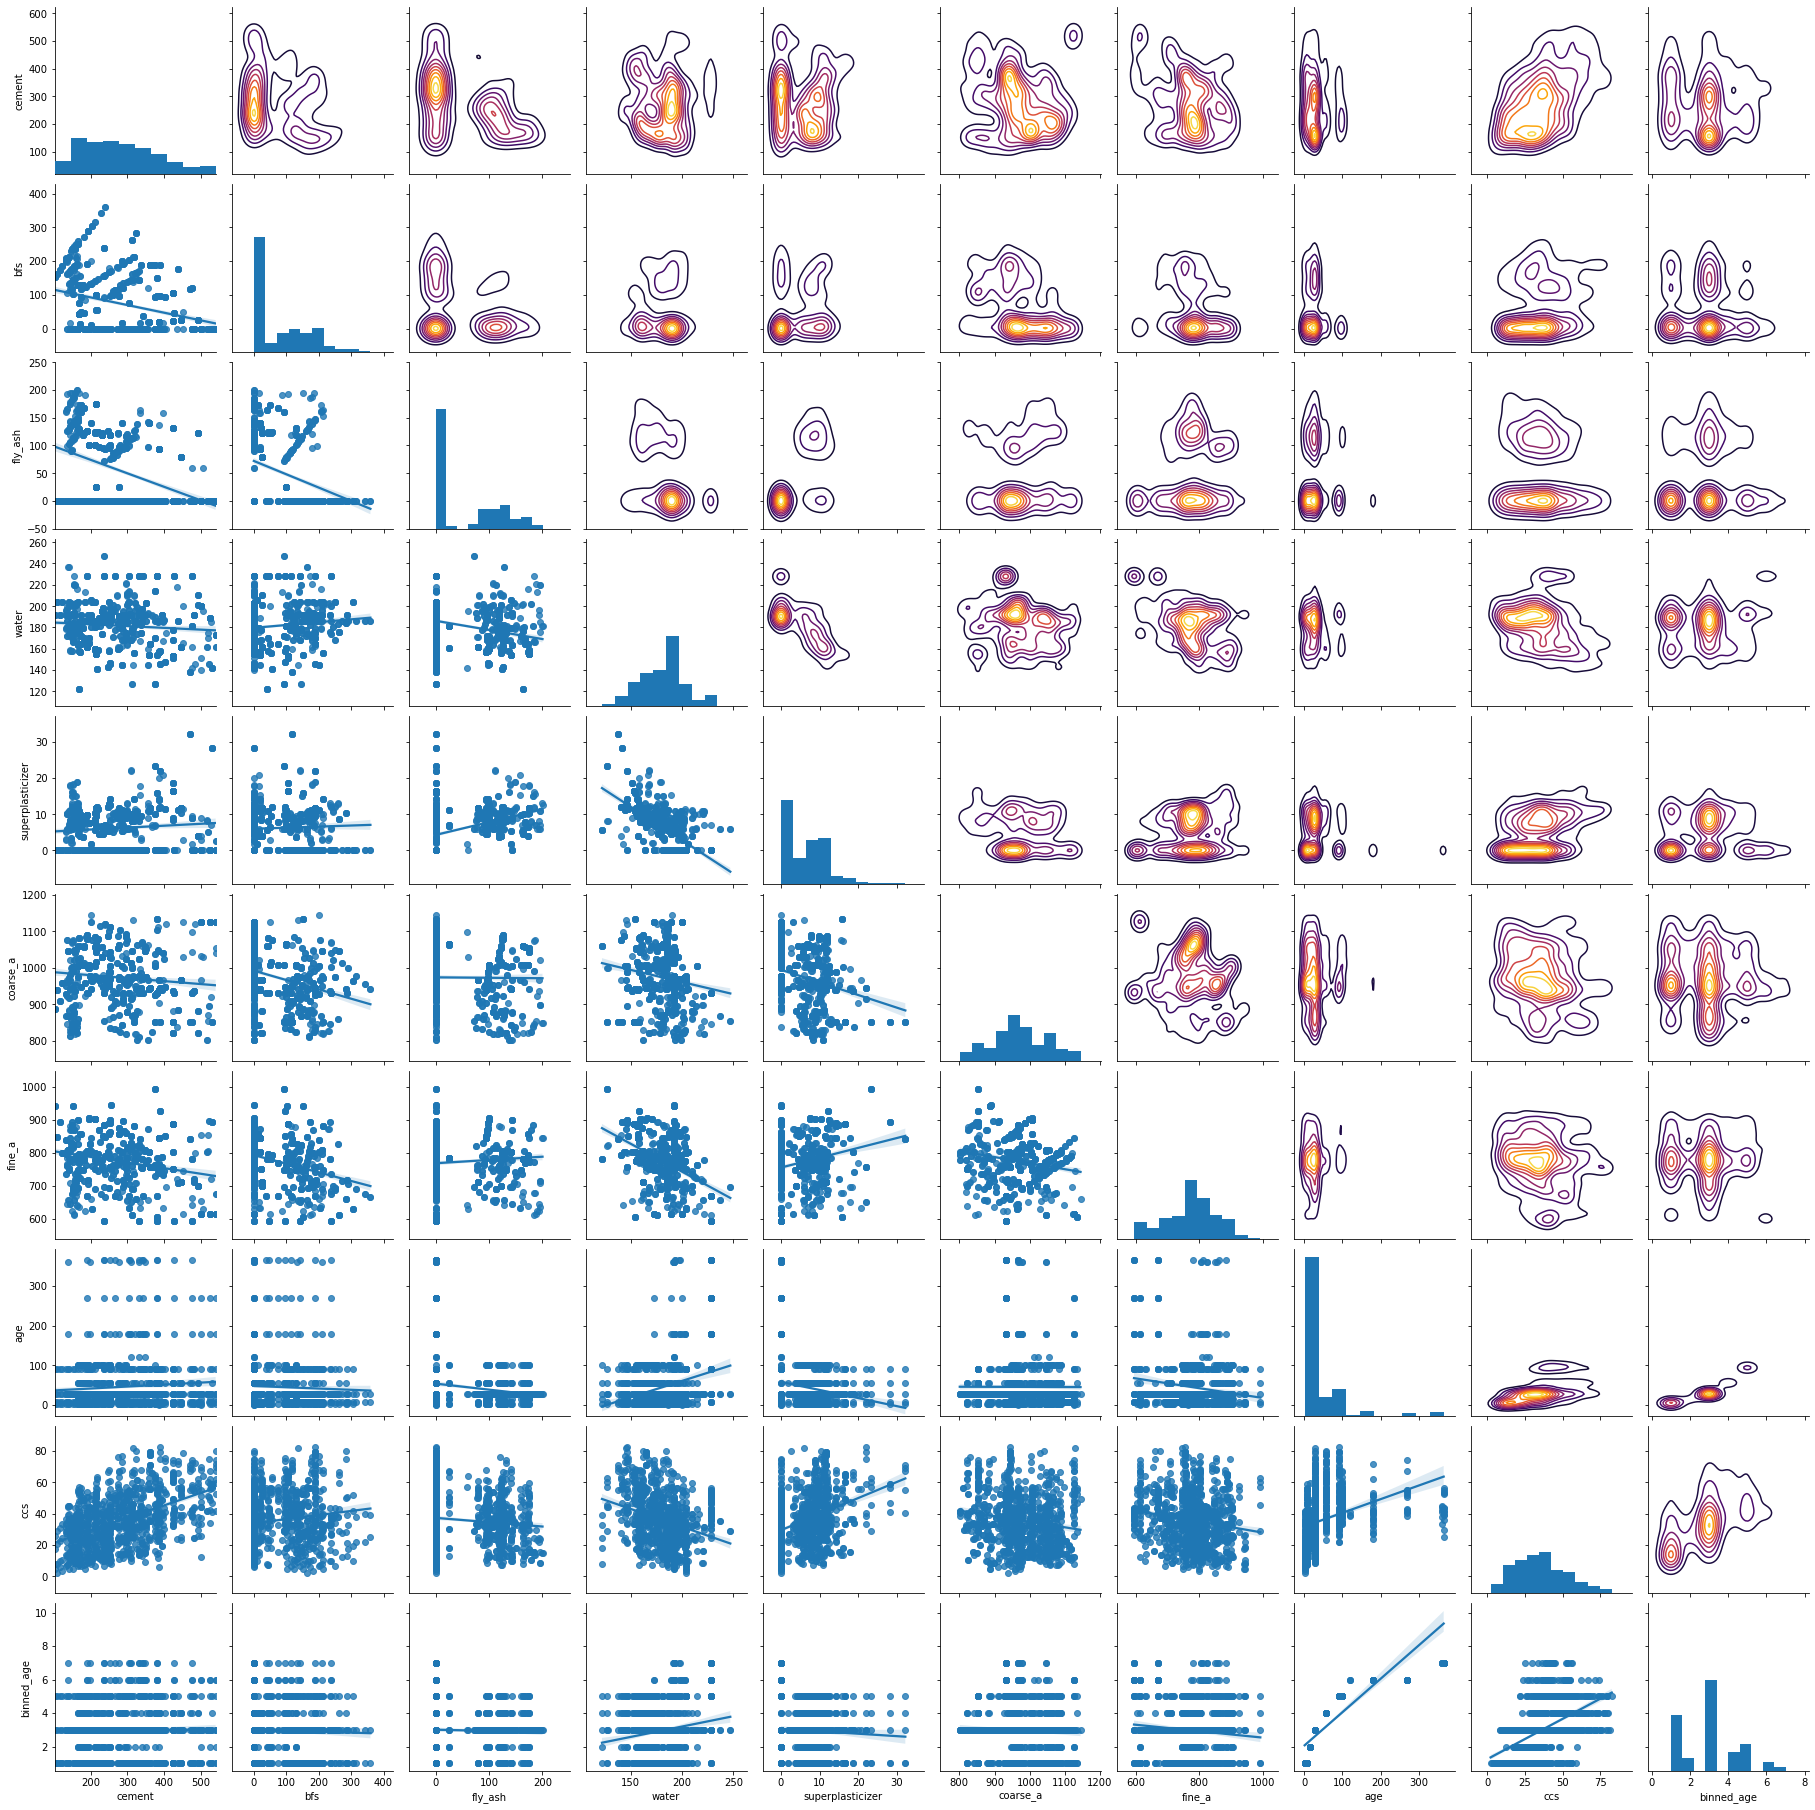

In [48]:
g = sns.PairGrid(df)
g = g.map_lower(sns.regplot)    # regression plots in lower tri
g = g.map_upper(sns.kdeplot, cmap="inferno", shade=False, shade_lowest=False)  # KDE plots in upper tri
g = g.map_diag(plt.hist)        # histograms along diagonal

plt.savefig('pairplot.png')
plt.show()

In [13]:
df.corr()

,cement,bfs,fly_ash,water,superplasticizer,coarse_a,fine_a,age,ccs,binned_age
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832,0.012707
bfs,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829,-0.033721
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755,-0.028893
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633,0.172428
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079,-0.056939
coarse_a,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935,-0.035201
fine_a,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241,-0.100625
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873,0.824483
ccs,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000,0.526858
binned_age,0.012707,-0.033721,-0.028893,0.172428,-0.056939,-0.035201,-0.100625,0.824483,0.526858,1.000000


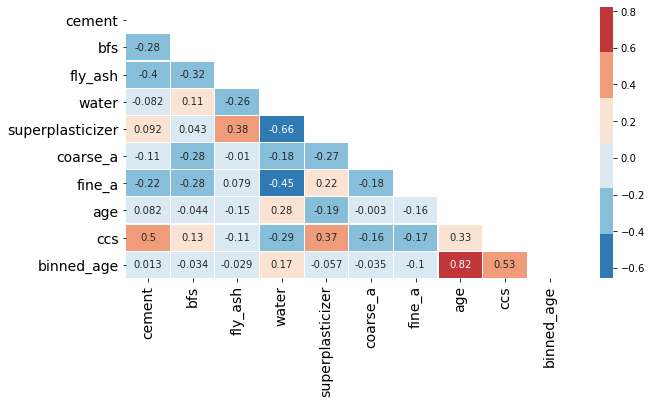

In [19]:
# Creating Correlation matrix
corrs = df.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(10,5))

# choosing color palette
c_palette = sns.color_palette('RdBu_r')

# enerate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask, annot=True,fmt='.2g', annot_kws={'fontsize':10},linewidths=.2,cmap=c_palette)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [10]:
df['wc_ratio'] = df.water/df.cement

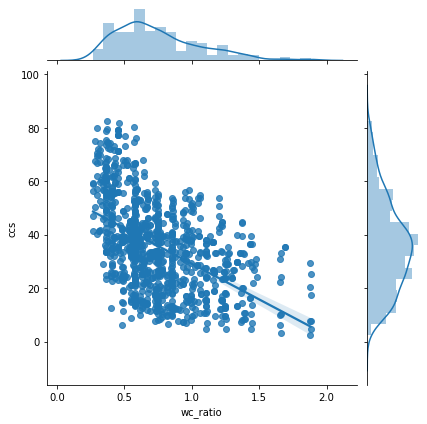

In [14]:
sns.jointplot(x="wc_ratio", y="ccs", data=df, kind="reg")
plt.savefig('water_cement_ratio.png')

Given the low linearity of the data, discretizing the data may help linear models to work.
But we won't know it until we see it.

Best way forward is to compare a few different models and see which one is the best with the data without any engineering.

The data is already in the same unit (kg/m3), except for age. For modeling we will use the binned age.

lets use OLS, a robust regressor and an ensamble regressor. I expect that the ensamble will do better on the test data than the other two.

In [6]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [7]:
# We are doint the test/train before the functions and putting a random state to guarantee the model testing is consistent
X = df.drop(['age','ccs'], axis=1)
y = df['ccs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print('Baseline:', round(df.ccs.sum()/len(df),2),'%')

Baseline: 35.82 %


In [11]:
# Making a little function to test the models - Test/Train split
def test_model_split(model):
    fitted_model = model.fit(X_train, y_train)
    prediction = fitted_model.predict(X_test)
    mse = metrics.mean_squared_error(y_test,prediction)
    rsqr = metrics.r2_score(y_test,prediction)
    score = fitted_model.score(X_test, y_test)
    print('Mean Squared Error', mse)
    print('Squared error', rsqr)
    print('Score',score)
    return fitted_model
# Making a little function to test the models - Crossvalidation
def test_model_crossval(model):
    score = cross_val_score(model, X,y, cv=5, n_jobs=-1)
    print(score)
    print('Mean Score',np.mean(score))
# plotting to visualize
def plot_prediction(predicted):  
    fig, ax = plt.subplots()
    ax.scatter(y, predicted)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()


#### Cross validating

In [12]:
# Testing OLS
test_model_crossval(LinearRegression())

[0.63469763 0.66727423 0.7257764  0.77129327 0.54380824]
Mean Score 0.6685699535351283


In [13]:
# Testing HR
test_model_crossval(HuberRegressor())

[0.67448349 0.64079371 0.73663892 0.74677876 0.54872152]
Mean Score 0.6694832800847046


In [14]:
# Testing RMF
test_model_crossval(RandomForestRegressor())

[ 0.62453017  0.67284158  0.73189922  0.82010092 -1.32632601]
Mean Score 0.3046091763270479


In [15]:
# Testing ETR
test_model_crossval(ExtraTreesRegressor())

[ 0.68785944  0.73906264  0.77153173  0.84634058 -0.86125795]
Mean Score 0.4367072890113173


#### Train test Split

In [16]:
# Testing OLS
ols = test_model_split(LinearRegression())

Mean Squared Error 53.46786776286867
Squared error 0.7969931646393301
Score 0.7969931646393301


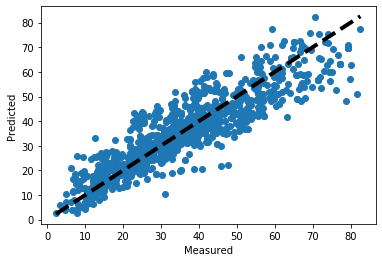

In [17]:
plot_prediction(ols.predict(X))

In [18]:
# Testing HR
hr = test_model_split(HuberRegressor(max_iter=1000))

Mean Squared Error 53.37161246333239
Squared error 0.7973586268236876
Score 0.7973586268236876


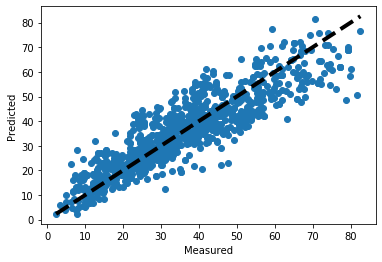

In [19]:
plot_prediction(hr.predict(X))

In [20]:
# Testing RMF
rf = test_model_split(RandomForestRegressor(n_estimators=1000))

Mean Squared Error 27.669150924610882
Squared error 0.8949457496372651
Score 0.8949457496372651


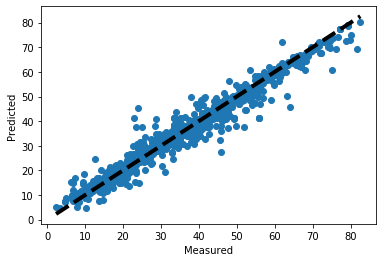

In [21]:
plot_prediction(rf.predict(X))

In [22]:
# Testing ETR
etr = test_model_split(ExtraTreesRegressor())

Mean Squared Error 28.676187223649983
Squared error 0.8911222335571415
Score 0.8911222335571415


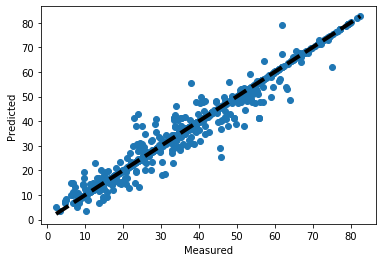

In [23]:
plot_prediction(etr.predict(X))

Good thing we looked at both test/train split and cross val scores.

Best model will be RandomForest. Not overfitted and not to variant.

In [80]:
# Let's tune some hiperparameters
param_grid = dict( n_estimators=[300, 400],
    ccp_alpha=[0.0,0.01,0.03])
gscv = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,cv=5, n_jobs=-1).fit(X,y)

In [82]:
gscv.best_params_

{'ccp_alpha': 0.0, 'n_estimators': 400}

In [83]:
rf = test_model_split(RandomForestRegressor(n_estimators=400))

Mean Squared Error 27.98347391189372
Squared error 0.8937523279131672
Score 0.8937523279131672


In [89]:
X.columns

Index(['cement', 'bfs', 'fly_ash', 'water', 'superplasticizer', 'coarse_a',
       'fine_a', 'binned_age'],
      dtype='object')

Lets look at the feature importance.

In [86]:
from sklearn.inspection import plot_partial_dependence

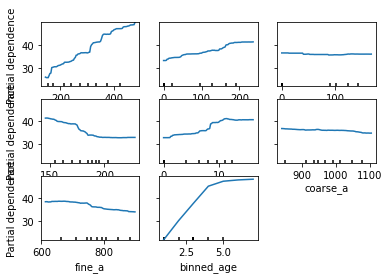

In [92]:
plot_partial_dependence(rf, X, features=X.columns)

In [64]:
rf_fit = rf.fit(X_train,y_train)
scores = pd.DataFrame({
    'feature':X.columns,
    'scores':rf_fit.feature_importances_
})
scores = scores.sort_values('scores',ascending=False)
# All regularized features that have coeficients above 0.
scores[scores['scores'].abs()> 0].T

,7,0,4,3,1,6,5,2
feature,binned_age,cement,superplasticizer,water,bfs,fine_a,coarse_a,fly_ash
scores,0.332052,0.288412,0.104748,0.104238,0.0756379,0.0443065,0.0297985,0.0208076


Let's make some plots to explaine/visualize some things and answer the project questions.

In [85]:
import scipy.stats as stats
without_agg = df[(df['fly_ash']!=0) & (df['bfs']!=0)].ccs
with_agg = df[(df['fly_ash']==0) & (df['bfs']==0)].ccs
unlikeliness = stats.ttest_ind(with_agg, without_agg)
unlikeliness

Ttest_indResult(statistic=-4.447445901475228, pvalue=1.0934941081659205e-05)

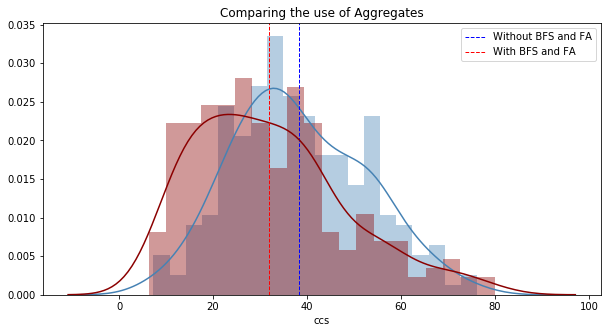

In [87]:
fig = plt.figure(figsize=(10,5))

ax = fig.gca()
# plotting without the aggregates
ax = sns.distplot(df[(df['fly_ash']!=0) & (df['bfs']!=0)].ccs, bins=20, color='steelblue', ax=ax)

ax.axvline(np.mean(df[(df['fly_ash']!=0) & (df['bfs']!=0)].ccs), color='blue', linestyle='--', lw=1)

# plotting with the aggregates
sns.distplot(df[(df['fly_ash']==0) & (df['bfs']==0)].ccs, bins=20, color='darkred', ax=ax)

ax.axvline(np.mean(df[(df['fly_ash']==0) & (df['bfs']==0)].ccs), color='red', linestyle='--', lw=1)

plt.title('Comparing the use of Aggregates')
plt.legend(labels=['Without BFS and FA', 'With BFS and FA'])

# plt.savefig('comparisson_aggregates')

In [73]:
df[(df['superplasticizer']==0)].ccs.describe()

count    379.000000
mean      29.517493
std       14.718924
min        2.330000
25%       17.390000
50%       28.020000
75%       39.535000
max       74.990000
Name: ccs, dtype: float64

In [75]:
df[(df['superplasticizer']!=0)].ccs.describe()

count    651.000000
mean      39.485975
std       16.709243
min        7.320000
25%       26.920000
50%       37.920000
75%       51.050000
max       82.600000
Name: ccs, dtype: float64

In [91]:
df[(df['superplasticizer']!=0) & (df['age']==7)].count()

cement              37
bfs                 37
fly_ash             37
water               37
superplasticizer    37
coarse_a            37
fine_a              37
age                 37
ccs                 37
binned_age          37
dtype: int64

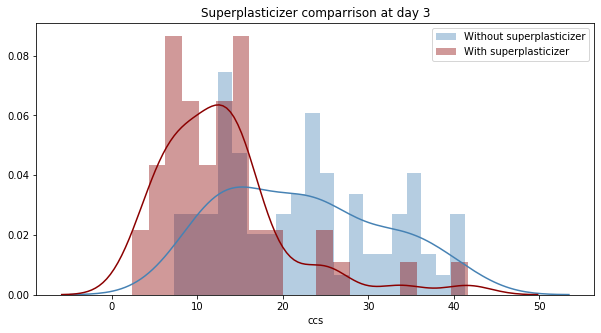

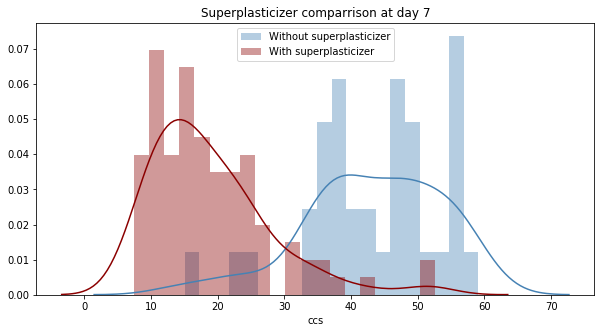

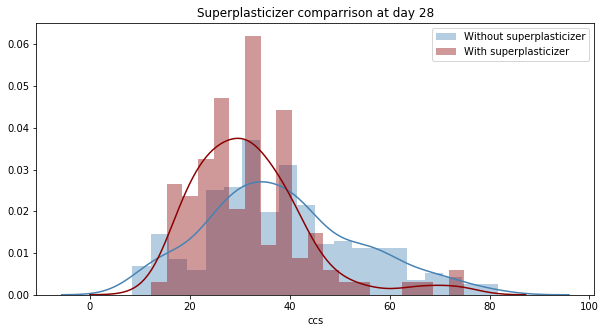

In [92]:
for x in [3,7,28]:
    
    fig = plt.figure(figsize=(10,5))

    ax = fig.gca()

    ax = sns.distplot(df[(df['superplasticizer']!=0) & (df['age']==x)].ccs, bins=20, color='steelblue', ax=ax)

    sns.distplot(df[(df['superplasticizer']==0) & (df['age']==x)].ccs, bins=20, color='darkred', ax=ax)

    plt.legend(labels=['Without superplasticizer', 'With superplasticizer'])
    plt.title('Superplasticizer comparrison at day '+str(x))

    plt.savefig('superplasticizer'+str(x))

In [104]:
# Getting a DF with the different avarage concrete compositions to make sense of what we just saw

composition_sp = pd.DataFrame({
    'W_SP_D3':df[(df['superplasticizer']!=0) & (df['age']==3)].mean(),
    'WO_SP_D3':df[(df['superplasticizer']==0) & (df['age']==3)].mean(),
    'W_SP_D7':df[(df['superplasticizer']!=0) & (df['age']==7)].mean(),
    'WO_SP_D7':df[(df['superplasticizer']==0) & (df['age']==7)].mean(),
    'W_SP_D28':df[(df['superplasticizer']!=0) & (df['age']==28)].mean(),
    'WO_SP_D28':df[(df['superplasticizer']==0) & (df['age']==28)].mean()
})
composition_sp

,W_SP_D3,WO_SP_D3,W_SP_D7,WO_SP_D7,W_SP_D28,WO_SP_D28
cement,292.331034,275.938298,391.527027,280.246067,257.053628,290.073148
bfs,57.485057,81.697872,104.016216,88.340449,89.050158,78.169444
fly_ash,86.395402,3.055319,43.054054,0.000000,83.547003,1.885185
water,166.602299,193.934043,163.827027,191.377528,179.978864,192.101852
superplasticizer,10.190805,0.000000,12.770270,0.000000,9.379180,0.000000
coarse_a,979.962069,972.223404,915.956757,1012.024719,937.619874,1010.182407
fine_a,798.993103,790.778723,786.062162,760.637079,766.418612,758.386111
age,3.000000,3.000000,7.000000,7.000000,28.000000,28.000000
ccs,22.292184,12.852340,43.315946,18.873258,38.378770,31.963796
binned_age,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000
